# Fraud Loan DataSet(Dynamics Prjects M20 Number 7)

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('loan.csv')
data
#Fraud  Loan Prediction 
# we need to predict whether to give loan to a person or not based on the information provided inte dataset
# Target -> Loan_status

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df=pd.DataFrame(data=data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [4]:
df1=df.copy()

In [5]:
df1.info()
# Null values are present in 'gender','married','dependents','selfemployed','loanamount','credit history' attributes
# The target is 'Loan Status'. Binary output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df1.isnull().sum()
# we can see the attribute wise NaN values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
imp=SimpleImputer(strategy='most_frequent')
# will use 'most frequent' technique to fill the miss values since its object data attribute

In [8]:
df1['Gender']=imp.fit_transform(df1['Gender'].values.reshape(-1,1))

In [9]:
le=LabelEncoder()

In [10]:
df1['Gender']=le.fit_transform(df1['Gender'])
# converting object data into numerical data

In [11]:
for i in df1['Gender'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['Male']
0=['Female']


In [12]:
df1['Married']=imp.fit_transform(df1['Married'].values.reshape(-1,1))

In [13]:
df1['Married']=le.fit_transform(df1['Married'])
# converting object data into numerical data

In [14]:
for i in df1['Married'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['No']
1=['Yes']


In [15]:
df1['Dependents']=imp.fit_transform(df1['Dependents'].values.reshape(-1,1))

In [16]:
df1['Self_Employed']=imp.fit_transform(df1['Self_Employed'].values.reshape(-1,1))

In [17]:
df1['Self_Employed']=le.fit_transform(df1['Self_Employed'])

In [18]:
for i in df1['Self_Employed'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['No']
1=['Yes']


In [19]:
df1['LoanAmount']=df1['LoanAmount'].replace(np.NaN,df1['LoanAmount'].mean())

In [20]:
df1['Loan_Amount_Term']=imp.fit_transform(df1['Loan_Amount_Term'].values.reshape(-1,1))

In [21]:
df1['Credit_History'].unique()

array([ 1.,  0., nan])

In [22]:
df1['Credit_History']=imp.fit_transform(df1['Credit_History'].values.reshape(-1,1))

In [23]:
df1['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [24]:
df1['Dependents']=le.fit_transform(df1['Dependents'])

In [25]:
for i in df1['Dependents'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['0']
1=['1']
2=['2']
3=['3+']


In [26]:
df1['Education']=le.fit_transform(df1['Education'])

In [27]:
for i in df1['Education'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['Graduate']
1=['Not Graduate']


In [28]:
df1['Property_Area']=le.fit_transform(df1['Property_Area'])

In [29]:
for i in df1['Property_Area'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

2=['Urban']
0=['Rural']
1=['Semiurban']


In [30]:
df1['Loan_Status']=le.fit_transform(df1['Loan_Status'])

In [31]:
df2=df1.drop('Loan_ID',axis=1)
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


{'bodies': [<matplotlib.collections.PolyCollection at 0x2aab6620548>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2aab6eb7ec8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2aab6ec5448>,
 'cbars': <matplotlib.collections.LineCollection at 0x2aab6ec50c8>}

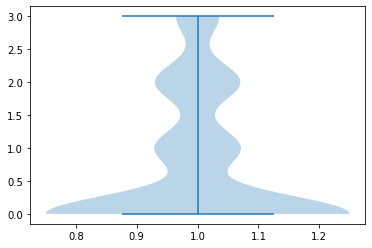

In [32]:
plt.violinplot(df2['Dependents'])
# most of the applicants have no dependants 

{'bodies': [<matplotlib.collections.PolyCollection at 0x2aab6f001c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2aab6f6df48>,
 'cmins': <matplotlib.collections.LineCollection at 0x2aab6f80cc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2aab6f80c48>}

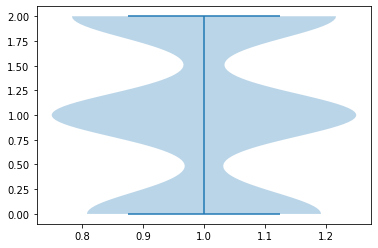

In [33]:
plt.violinplot(df2['Property_Area'])
# applicants ae from all three location -rural,urban & semiurban

{'whiskers': [<matplotlib.lines.Line2D at 0x2aab6fecd48>,
 'caps': [<matplotlib.lines.Line2D at 0x2aab7003b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aab7001788>],
 'medians': [<matplotlib.lines.Line2D at 0x2aab7009b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aab7010988>],
 'means': []}

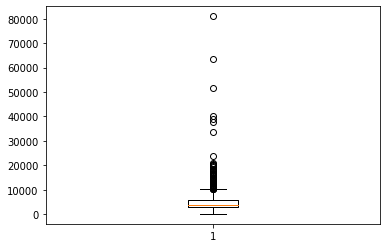

In [34]:
plt.boxplot(df2['ApplicantIncome'])
# have outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2aab7078b48>,
 'caps': [<matplotlib.lines.Line2D at 0x2aab707cc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aab7073f88>],
 'medians': [<matplotlib.lines.Line2D at 0x2aab7080d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aab7080e08>],
 'means': []}

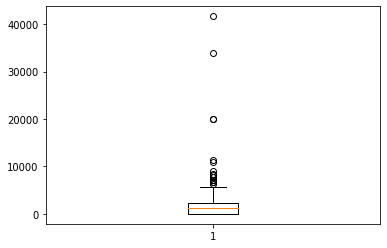

In [35]:
plt.boxplot(df2['CoapplicantIncome'])
# have outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2aab70dde88>,
 'caps': [<matplotlib.lines.Line2D at 0x2aab70e1e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aab70dd3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2aab70e5dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aab70e5ec8>],
 'means': []}

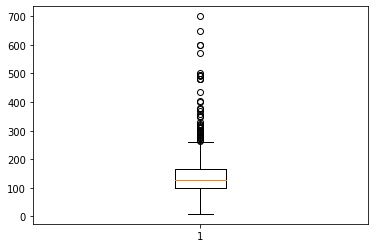

In [36]:
plt.boxplot(df2['LoanAmount'])
# have outliers 

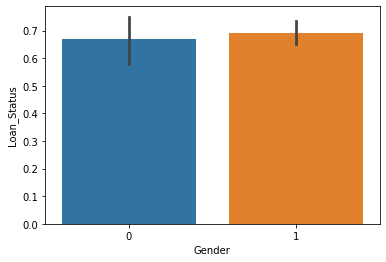

In [37]:
sns.barplot(x='Gender',y='Loan_Status',data=df2)
# applicants are distributed among both genders almost equally

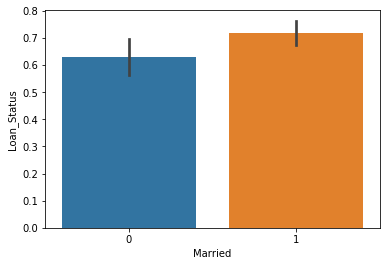

In [38]:
sns.barplot(x='Married',y='Loan_Status',data=df2)
# more applicants fall into 'married category'

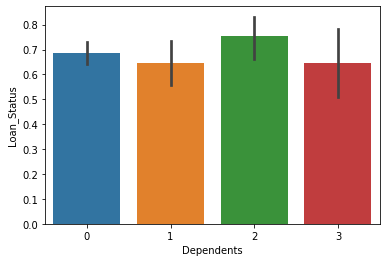

In [39]:
sns.barplot(x='Dependents',y='Loan_Status',data=df2)
#

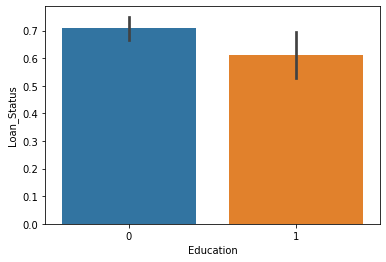

In [40]:
sns.barplot(x='Education',y='Loan_Status',data=df2)
# applicants from 'not graduate category' applied more for loan

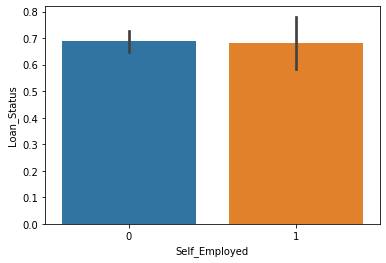

In [41]:
sns.barplot(x='Self_Employed',y='Loan_Status',data=df2)

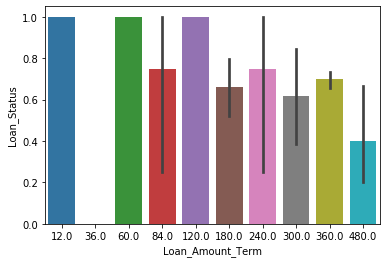

In [42]:
sns.barplot(x='Loan_Amount_Term',y='Loan_Status',data=df2)

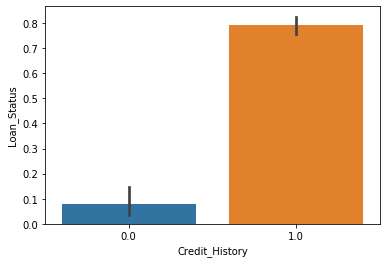

In [43]:
sns.barplot(x='Credit_History',y='Loan_Status',data=df2)
# applicants with positive report on credit history are more prone to get the loan approved

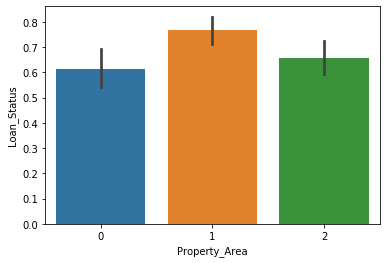

In [44]:
sns.barplot(x='Property_Area',y='Loan_Status',data=df2)

# Cleaning the dataset

In [45]:
z=np.abs(zscore(df2))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [46]:
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [47]:
df2n=df2[(z<3).all(axis=1)]
df2n.shape

(577, 12)

In [48]:
df2n.skew()
# many of the attributes are having skewed data. we might need to apply scalling to feature columns

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [49]:
df2n.describe()
# data is quite spread out for applicantincome, coapplicantincome,loanamount & loan amount term
# 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.814558,0.649913,0.719237,0.227036,0.126516,4666.020797,1420.807487,136.048644,348.041594,0.850953,1.031196,0.689775
std,0.388993,0.477411,0.995229,0.419280,0.332719,2965.452652,1651.545352,56.193532,51.845909,0.356444,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1255.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5532.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


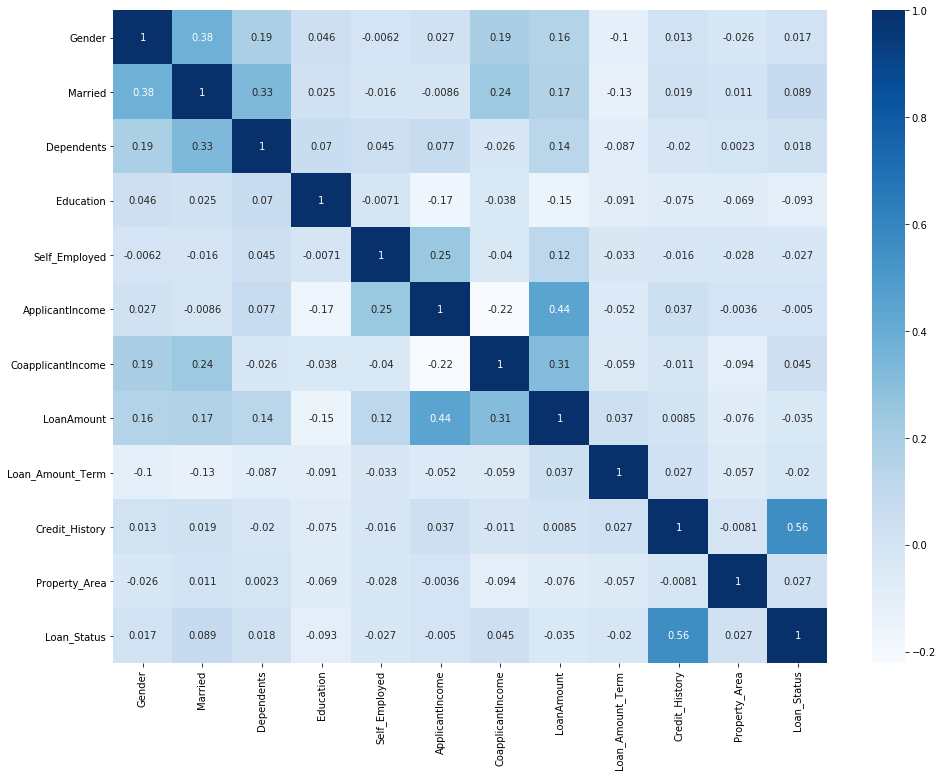

In [50]:
plt.figure(figsize=(16,12))
sns.heatmap(df2n.corr(),cmap='Blues',annot=True)
# checking corealtion
# loan amount shows negative relation with target. more the loan amount, less the chance of getting approval
# education also shows negative realtion 

# Training the Model

In [51]:
x=df2n.iloc[:,0:-1]
# feature attributes

In [52]:
y=df2n.iloc[:,-1]
# target attribute

In [53]:
scale=StandardScaler()
# regularising the feuture columns to avoid underfitting and over fitting

In [54]:
x=scale.fit_transform(x)

In [55]:
# Since the target is binary, we can use logistic regression to train the model
# lets optimise the seed value to get the highest possible accuracy score 
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.8333333333333334
accuracy score correspondng to random state 42 is: 0.8505747126436781
accuracy score correspondng to random state 43 is: 0.7701149425287356
accuracy score correspondng to random state 44 is: 0.8045977011494253
accuracy score correspondng to random state 45 is: 0.8045977011494253
accuracy score correspondng to random state 46 is: 0.8103448275862069
accuracy score correspondng to random state 47 is: 0.8103448275862069
accuracy score correspondng to random state 48 is: 0.8218390804597702
accuracy score correspondng to random state 49 is: 0.8160919540229885
accuracy score correspondng to random state 50 is: 0.8333333333333334
accuracy score correspondng to random state 51 is: 0.8275862068965517
accuracy score correspondng to random state 52 is: 0.8448275862068966
accuracy score correspondng to random state 53 is: 0.8103448275862069
accuracy score correspondng to random state 54 is: 0.7701149425287356
accuracy score corre

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,test_size=0.3)
# Here we use seed value (random state) of 48 to train the model

In [86]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.8793103448275862
[[ 23  18]
 [  3 130]]
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        41
           1       0.88      0.98      0.93       133

    accuracy                           0.88       174
   macro avg       0.88      0.77      0.81       174
weighted avg       0.88      0.88      0.87       174

[1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
AxesSubplot(0.125,0.125;0.62x0.755)


Cross_val_score is:
 0.8183085919928026


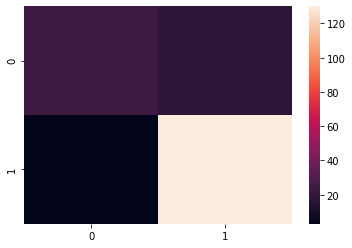

In [87]:
score=accuracy_score(y_test,pred)
matrix=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
pred=lg.predict(x_test)
print(score)
print(matrix)
print(report)
print(pred)
print(sns.heatmap(matrix))
print('\n')
cvs=cross_val_score(lg,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [59]:
y_pred_prob=lg.predict_proba(x_test)[:,-1]
y_pred_prob

array([0.68246045, 0.04380805, 0.7982833 , 0.53384352, 0.82575813,
       0.8314636 , 0.18253486, 0.69216105, 0.82136393, 0.79108808,
       0.75936054, 0.65653382, 0.78006996, 0.82377689, 0.08946581,
       0.86586553, 0.83380117, 0.79203476, 0.71872663, 0.56903849,
       0.6744529 , 0.89363118, 0.70488624, 0.737336  , 0.73146169,
       0.83180429, 0.85591861, 0.70622015, 0.80736515, 0.75662493,
       0.79625415, 0.69644268, 0.7523526 , 0.78325551, 0.07970157,
       0.81243597, 0.81710982, 0.143631  , 0.77926339, 0.81365572,
       0.78341126, 0.80399986, 0.14460346, 0.7077973 , 0.82365426,
       0.82431573, 0.77499627, 0.03930073, 0.75865211, 0.84629559,
       0.67847929, 0.10647067, 0.81375402, 0.72479735, 0.86086808,
       0.74944105, 0.74071369, 0.71279687, 0.80768461, 0.8122962 ,
       0.03283567, 0.04146711, 0.67005547, 0.05304323, 0.53657205,
       0.82398813, 0.75615792, 0.88166687, 0.6661906 , 0.75128704,
       0.74225492, 0.74592949, 0.84060972, 0.671835  , 0.80895

In [60]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

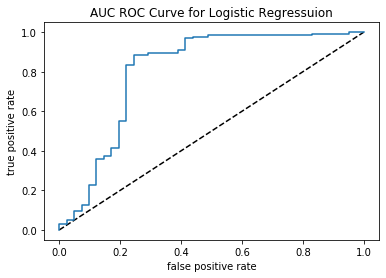

In [61]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for Logistic Regressuion')
plt.show()

In [62]:
knn= KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

0.8793103448275862
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        41
           1       0.88      0.98      0.93       133

    accuracy                           0.88       174
   macro avg       0.88      0.77      0.81       174
weighted avg       0.88      0.88      0.87       174

[[ 23  18]
 [  3 130]]
Cross_val_score is:
 0.8078272604588397


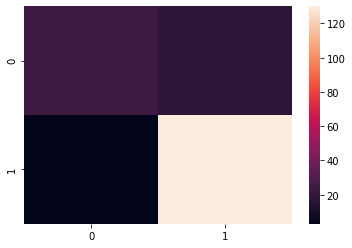

In [63]:
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(knn,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [64]:
y_pred_prob=knn.predict_proba(x_test)[:,-1]
y_pred_prob

array([0.7 , 0.05, 0.8 , 0.55, 0.85, 0.85, 0.5 , 0.5 , 0.9 , 0.75, 0.9 ,
       0.6 , 0.9 , 0.8 , 0.25, 0.8 , 0.85, 0.8 , 0.85, 0.55, 0.65, 0.95,
       0.65, 0.8 , 0.8 , 0.8 , 0.7 , 0.75, 0.75, 0.75, 0.9 , 0.8 , 0.7 ,
       1.  , 0.25, 0.8 , 0.8 , 0.35, 0.85, 0.9 , 0.75, 0.7 , 0.5 , 0.7 ,
       0.75, 0.9 , 0.7 , 0.25, 0.7 , 0.75, 0.9 , 0.3 , 0.85, 0.7 , 0.75,
       0.9 , 0.8 , 0.85, 0.95, 0.95, 0.3 , 0.15, 0.85, 0.3 , 0.7 , 0.85,
       0.7 , 0.9 , 0.8 , 0.85, 0.8 , 0.7 , 0.95, 0.7 , 0.8 , 0.25, 0.8 ,
       0.8 , 0.7 , 0.75, 0.85, 0.8 , 0.8 , 0.75, 0.35, 0.9 , 0.9 , 0.7 ,
       0.6 , 0.9 , 0.1 , 0.7 , 0.65, 0.8 , 0.5 , 0.25, 0.55, 0.9 , 0.75,
       0.7 , 0.65, 0.75, 0.9 , 0.8 , 0.85, 0.85, 0.75, 0.9 , 0.05, 0.8 ,
       0.6 , 0.7 , 0.25, 0.7 , 0.6 , 0.2 , 0.75, 0.8 , 0.5 , 0.8 , 0.9 ,
       0.95, 0.9 , 0.35, 0.9 , 0.75, 0.8 , 0.15, 0.7 , 0.8 , 0.85, 0.75,
       0.9 , 0.95, 0.85, 0.8 , 0.8 , 0.9 , 0.7 , 0.9 , 0.75, 0.75, 0.9 ,
       0.8 , 0.75, 0.75, 0.85, 0.8 , 0.85, 0.75, 0.

In [65]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

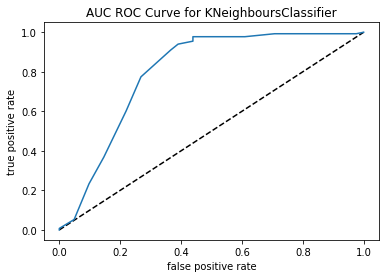

In [66]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for KNeighboursClassifier')
plt.show()

In [67]:
dtc=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.7106527093596059
{'criterion': 'entropy'}


In [68]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.7126436781609196
              precision    recall  f1-score   support

           0       0.42      0.61      0.50        41
           1       0.86      0.74      0.80       133

    accuracy                           0.71       174
   macro avg       0.64      0.68      0.65       174
weighted avg       0.76      0.71      0.73       174

[[25 16]
 [34 99]]
Cross_val_score is:
 0.7247413405308142


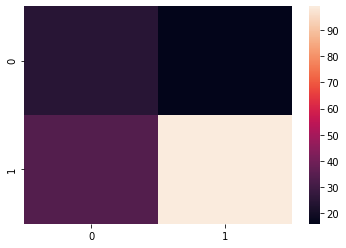

In [69]:
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(dtc,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [70]:
y_pred_prob=dtc.predict_proba(x_test)[:,-1]
y_pred_prob

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1.])

In [71]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

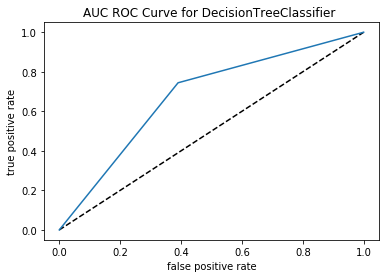

In [72]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for DecisionTreeClassifier ')
plt.show()

In [73]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

0.8793103448275862
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        41
           1       0.88      0.98      0.93       133

    accuracy                           0.88       174
   macro avg       0.88      0.77      0.81       174
weighted avg       0.88      0.88      0.87       174

[[ 23  18]
 [  3 130]]
Cross_val_score is:
 0.8165542060278902


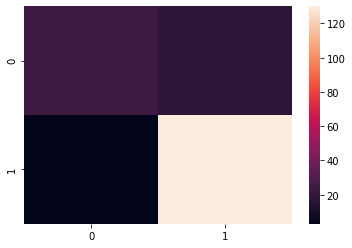

In [74]:
pred=gb.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(gb,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [75]:
y_pred_prob=gb.predict_proba(x_test)[:,-1]
y_pred_prob

array([8.19713341e-01, 1.96678684e-18, 9.66037731e-01, 6.93325334e-01,
       8.06044912e-01, 9.39405440e-01, 5.13142030e-18, 9.25536688e-01,
       9.05733868e-01, 9.50132272e-01, 9.19206876e-01, 8.09218202e-01,
       9.64458635e-01, 8.88287995e-01, 2.88854886e-18, 9.38471455e-01,
       9.59619333e-01, 9.57550797e-01, 9.49980707e-01, 8.51747992e-01,
       9.13373011e-01, 9.44015790e-01, 8.38077711e-01, 9.31356098e-01,
       9.06709315e-01, 9.60908034e-01, 8.95929523e-01, 9.08516806e-01,
       8.21169322e-01, 8.90866726e-01, 9.62471791e-01, 8.52021762e-01,
       9.49340445e-01, 9.56157646e-01, 4.92754688e-18, 9.51021179e-01,
       9.76098299e-01, 2.66692527e-18, 9.34545385e-01, 9.22275882e-01,
       9.37844658e-01, 9.57262690e-01, 1.91280916e-18, 8.21707973e-01,
       9.68462553e-01, 9.25860248e-01, 9.50134538e-01, 2.02826382e-18,
       9.48603382e-01, 9.72244934e-01, 9.22406924e-01, 7.75586120e-18,
       9.58280110e-01, 9.28981568e-01, 8.86469206e-01, 9.24454438e-01,
      

In [76]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

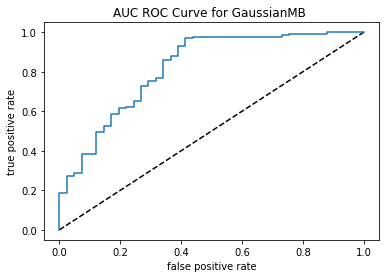

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for GaussianMB ') 
plt.show()

In [78]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
pred=rf.predict(x_test)
rf.score(x_train,y_train)

1.0

0.8448275862068966
              precision    recall  f1-score   support

           0       0.68      0.63      0.66        41
           1       0.89      0.91      0.90       133

    accuracy                           0.84       174
   macro avg       0.79      0.77      0.78       174
weighted avg       0.84      0.84      0.84       174

[[ 26  15]
 [ 12 121]]


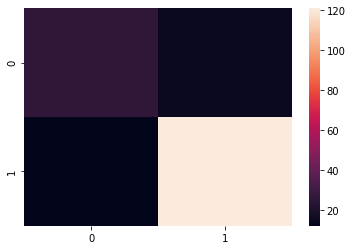

In [80]:
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))

In [81]:
ad=AdaBoostClassifier(n_estimators=250,base_estimator=lg)
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=250, random_state=None)

0.8793103448275862
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        41
           1       0.88      0.98      0.93       133

    accuracy                           0.88       174
   macro avg       0.88      0.77      0.81       174
weighted avg       0.88      0.88      0.87       174

[[ 23  18]
 [  3 130]]


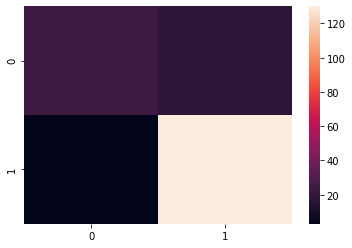

In [82]:
pred=ad.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))

# Observation/Conclusion and saving the model

In [ ]:
# As we can observe Logistic regression is providing accuracy score of 0.87931
# As we can observe Knn is providing accuracy score of 0.87931
# As we can observe dtc is providing accuracy score of 0.71264
# # As we can observe gb is providing accuracy score of 0.87931
# As we can observe RandomForestClassifier  is providing accuracy score of 0.8448
# As we can observe AdaboostClassifier is providing accuracy score of 0.87931

In [ ]:
# so we can save the adaboostclassifier to train the model and save it

In [83]:
pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [84]:
joblib.dump(ad,'adloan.obj')

['adloan.obj']